In [4]:
import pandas as pd

train_data = pd.read_csv('/content/fraudTrain.csv')
test_data = pd.read_csv('/content/fraudTest.csv')

print(train_data.head())
print("TEST DATA")
print(test_data.head())


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

print(train_data.isnull().sum())
train_data = train_data.dropna()
print(train_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat            

In [9]:
print(train_data.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


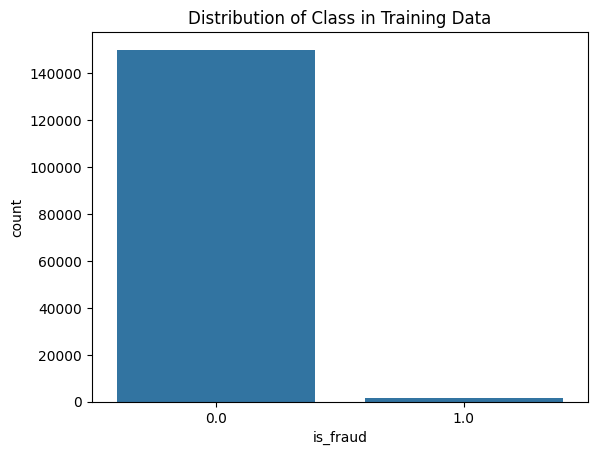

In [10]:
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Class in Training Data')
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X_train = train_data.drop(columns=['is_fraud'])
y_train = train_data['is_fraud']
X_test = test_data.drop(columns=['is_fraud'])
y_test = test_data['is_fraud']



In [14]:
print(train_data.dtypes)


Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object


In [18]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

train_data['year'] = train_data['trans_date_trans_time'].dt.year
train_data['month'] = train_data['trans_date_trans_time'].dt.month
train_data['day'] = train_data['trans_date_trans_time'].dt.day
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour

test_data['year'] = test_data['trans_date_trans_time'].dt.year
test_data['month'] = test_data['trans_date_trans_time'].dt.month
test_data['day'] = test_data['trans_date_trans_time'].dt.day
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour

train_data = train_data.drop(columns=['trans_date_trans_time'])
test_data = test_data.drop(columns=['trans_date_trans_time'])


In [20]:
# Check for non-numeric columns again
print(train_data.dtypes)

# Drop any remaining non-numeric columns if necessary
# Assuming there might be other non-numeric columns
non_numeric_columns = train_data.select_dtypes(include=['object']).columns
train_data = train_data.drop(columns=non_numeric_columns)
test_data = test_data.drop(columns=non_numeric_columns)


Unnamed: 0      int64
cc_num          int64
merchant       object
category       object
amt           float64
first          object
last           object
gender         object
street         object
city           object
state          object
zip           float64
lat           float64
long          float64
city_pop      float64
job            object
dob            object
trans_num      object
unix_time     float64
merch_lat     float64
merch_long    float64
is_fraud      float64
year            int32
month           int32
day             int32
hour            int32
dtype: object


In [21]:
X_train = train_data.drop(columns=['is_fraud'])
y_train = train_data['is_fraud']
X_test = test_data.drop(columns=['is_fraud'])
y_test = test_data['is_fraud']


In [22]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [24]:

print(train_data.isnull().sum())
print(test_data.isnull().sum())


Unnamed: 0    0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
year          0
month         0
day           0
hour          0
dtype: int64
Unnamed: 0    0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     1
merch_lat     1
merch_long    1
is_fraud      1
year          0
month         0
day           0
hour          0
dtype: int64


In [25]:
test_data = test_data.dropna()


In [26]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)
lr_predictions = lr_model.predict(X_test_scaled)
print("Logistic Regression")
print(classification_report(y_test, lr_predictions))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)
dt_predictions = dt_model.predict(X_test_scaled)
print("Decision Tree")
print(classification_report(y_test, dt_predictions))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_model.predict(X_test_scaled)
print("Random Forest")
print(classification_report(y_test, rf_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00    135361
         1.0       0.00      1.00      0.01       588

    accuracy                           0.00    135949
   macro avg       0.00      0.50      0.00    135949
weighted avg       0.00      0.00      0.00    135949

Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    135361
         1.0       0.03      0.46      0.05       588

    accuracy                           0.92    135949
   macro avg       0.51      0.70      0.51    135949
weighted avg       0.99      0.92      0.96    135949

Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    135361
         1.0       0.56      0.27      0.37       588

    accuracy                           1.00    135949
   macro avg       0.78      0.64      0.68    135949
weighted avg       0.99      1.00      1.00   

The Random Forest model is the best among the three models based on the given metrics. It offers a better balance between precision and recall for the minority class (fraudulent transactions) while maintaining high performance for the majority class (legitimate transactions).

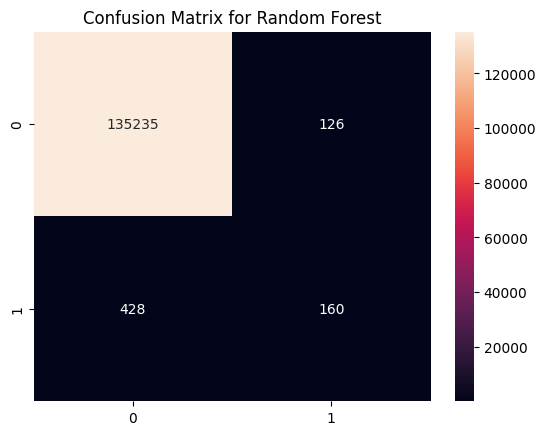

In [27]:
# Confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, rf_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1')
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

# Train the final model with best parameters
final_rf_model = RandomForestClassifier(**best_params)
final_rf_model.fit(X_train_resampled, y_train_resampled)
final_rf_predictions = final_rf_model.predict(X_test_scaled)
print(classification_report(y_test, final_rf_predictions))


In [ ]:
# Confusion matrix for the final model
final_conf_matrix = confusion_matrix(y_test, final_rf_predictions)
sns.heatmap(final_conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix for Final Random Forest Model')
plt.show()
